# Fake News Prediction

In this notebook, I will be analyzing the data aquired from <a href='https://www.kaggle.com/'>Kaggle</a>, in order to prepare the data for creating a predicting machine learning model for <b>Fake News Detection</b>. The created model will be used in a fake news detector website in order to fulfill the requirements of <b>Advanced Programming</b> subject.

# Data analysis and preprocessing

In every machine learning project, in order to manipulate with data, we will always need <b>Pandas</b> library. That's why we will import it in the beginning of the file.

In [1]:
import pandas as pd
import pickle
import string
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In our dataset, data is separated into two different files: 

- Fake
- True

Representing fake and true news. Since we will be using <b>Supervised Learning</b>, what we plan to do is concatenate both files in one training_data file and mark the data with a label as fake with 0 and true with 1. But first, we will analyse True and Fake dataset separately and assign the label. 

In [2]:
df_true = pd.read_csv('Datasets/True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_fake = pd.read_csv('Datasets/Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
label_value = 1
df_true['label'] = label_value
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
label_value = 0
df_fake['label'] = label_value
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Below, we concatenated both dataframes and shuffled all the rows in order to mix the data.

In [6]:
df = pd.concat([df_true, df_fake], axis=0, ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


Let's check other information regarding our dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

### Prepare data

In [9]:
df = df.drop(columns = ['title','subject','date'])
df.head()

,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0


We can save the final dataframe in a csv file just in case it will be needed but this is completely not neccessary.

In [12]:
df.to_csv('Datasets/final_data_file.csv', index=False)

In [13]:
df

,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0
...,...,...
44893,ABUJA (Reuters) - The United States has formal...,1
44894,Tune in to the Alternate Current Radio Network...,0
44895,I m convinced the Freedom From Religion group...,0
44896,WASHINGTON (Reuters) - The Republican tax plan...,1


## Processing of <i>'text'</i> column with Natural Language Toolkit

In [13]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,text,label
0,"donald trump s white house is in chaos, and th...",0
1,now that donald trump is the presumptive gop n...,0
2,mike pence is a huge homophobe. he supports ex...,0
3,san francisco (reuters) - california attorney ...,1
4,twisted reasoning is all that comes from pelos...,0


In [14]:
# Remove punctuation

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)
df.head()

,text,label
0,donald trump s white house is in chaos and the...,0
1,now that donald trump is the presumptive gop n...,0
2,mike pence is a huge homophobe he supports exg...,0
3,san francisco reuters california attorney gen...,1
4,twisted reasoning is all that comes from pelos...,0


In [15]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stop])

df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text,label
0,donald trump white house chaos trying cover ru...,0
1,donald trump presumptive gop nominee time reme...,0
2,mike pence huge homophobe supports exgay conve...,0
3,san francisco reuters california attorney gene...,1
4,twisted reasoning comes pelosi days especially...,0


In [16]:
x = df['text']

In [17]:
y = df['label']

In [18]:
x.shape
y.shape

(44898,)

# Machine Learning Model

In the following lines, we will train our model using multiple algorithms and select the one with the highest accuracy score. To do so, we split our dataset into training and testing data.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LogReg = LogisticRegression(random_state=42)
LogReg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [25]:
LogReg.score(x_test, y_test)

0.9891982182628062

In [27]:
prediction_LR = LogReg.predict(x_test)
print(classification_report(y_test, prediction_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [28]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_LR)


0.9861559760036918

### Model evaluation using Confusion Matrix

In [30]:
cm = confusion_matrix(y_test, prediction_LR)

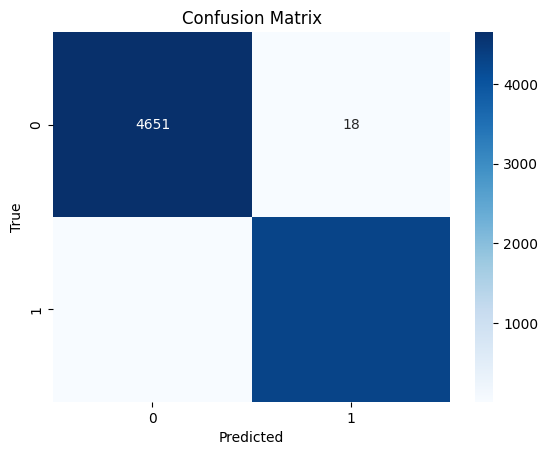

In [46]:

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=LogReg.classes_, yticklabels=LogReg.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Decision-Tree Classification

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier(random_state=42)

In [40]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
DT.score(x_test, y_test)

0.9963251670378619

In [42]:
prediction_DT = DT.predict(x_test)

In [43]:
print(classification_report(y_test, prediction_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4669
           1       1.00      1.00      1.00      4311

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### Model evaluation using Confusion Matrix

In [44]:
cm = confusion_matrix(y_test, prediction_DT)

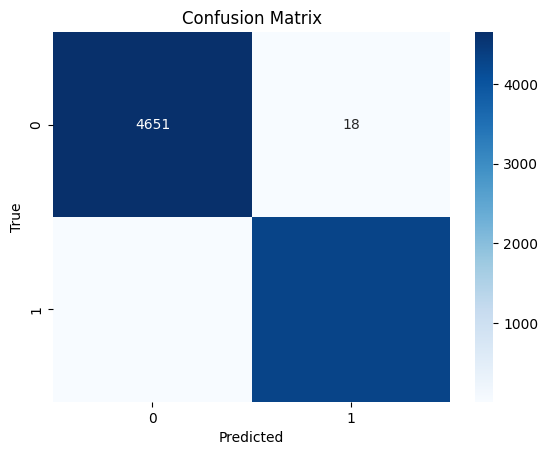

In [47]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=DT.classes_, yticklabels=DT.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RFC = RandomForestClassifier(random_state = 42)

In [28]:
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
RFC.score(x_test, y_test)

0.9926503340757238

In [32]:
prediction_RFC = RFC.predict(x_test)
print(classification_report(y_test, prediction_RFC))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4669
           1       0.99      1.00      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### Model evaluation using Confusion Matrix

In [33]:
cm = confusion_matrix(y_test, prediction_RFC)

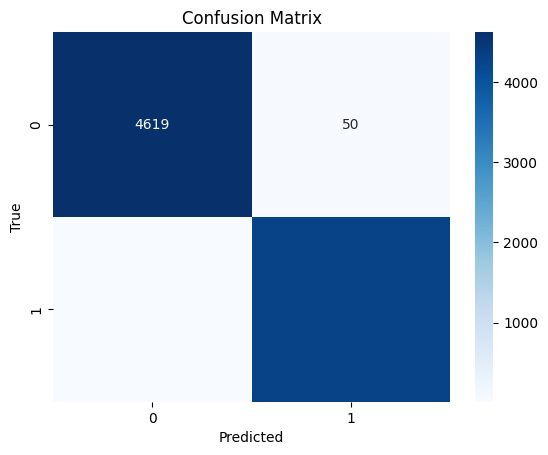

In [34]:
sns.heatmap(cm, annot = True, fmt="d", cmap="Blues", cbar=True,
            xticklabels = RFC.classes_, yticklabels = RFC.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Saving the model

We can see that Decision Tree Algorithm is giving us the best results. So we will use it for our model. 

In [33]:
filename = 'PickledModel/decision_tree_model.pkl'
pickle.dump(DT, open(filename, 'wb'))


I will save the vector as well, this way we do not need to re-run the code all over again.

In [34]:
pickle.dump(vect, open('PickledModel/vector.pkl', 'wb'))

# Test the model

In [35]:
vector_form = pickle.load(open('PickledModel/vector.pkl', 'rb'))
load_model = pickle.load(open('PickledModel/decision_tree_model.pkl', 'rb'))

In [36]:
def fake_news_det(news):
    news = punctuation_removal(news)
    news = news.lower()
    news = remove_stopwords(news)
    test = vector_form.transform([news])
    prediction = load_model.predict(test)
    return prediction

In [37]:
val = fake_news_det(("Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."))

In [38]:
if val[0] == 1:
    print("Real News")
else:
    print("Fake News")

Fake News
